In [1]:
# E3.ipynb

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# To ensure reproducibility
np.random.seed(42)

# Read data from Excel file
file_path = 'E3.xlsx'
train_data = pd.read_excel(file_path, sheet_name='train')
test_data = pd.read_excel(file_path, sheet_name='test')

In [3]:
# Separate features and target variable in train data
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']

# Separate features and target variable in test data
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

In [4]:
# # Adding outliers (UNCOMMENT ONLY WHEN REQUIRED! SEE THE PROBLEM STATEMENTs ...)
# X_train = np.array(list(X_train['x1']) + [X_train['x1'].mean() + x for x in np.random.randn(5)]).reshape(-1,1)
# y_train = np.array(list(y_train) + [y_train.max() + 4 + x for x in np.random.randn(5)])

In [5]:
# Use PolynomialFeatures to create features
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# # Polynomial features without standardization
# poly = PolynomialFeatures(degree=10)
# X_train_poly_no_std = poly.fit_transform(X_train)
# X_test_poly_no_std = poly.transform(X_test)

In [6]:
# standardization of the data
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)
# # Polynomial features with standardization 
# scaler = StandardScaler()
# X_train_poly_std = scaler.fit_transform(X_train_poly_no_std)
# X_test_poly_std = scaler.transform(X_test_poly_no_std)

In [7]:
####################################
# Save the augmented data set to a file for review

# Create dataframe with test data and additional features
# Get feature names
feature_names = poly.get_feature_names_out()
augmented_data = pd.DataFrame(X_train_poly, columns=feature_names)
augmented_data['y'] = train_data['y']

# # Write dataframe to CSV
augmented_data.to_csv('augmented_train_data.csv', index=False)
####################################
####################################
# Save the augmented data set to a file for review

# Create dataframe with test data and additional features
# Get feature names
feature_names = poly.get_feature_names_out()
augmented_data = pd.DataFrame(X_test_poly, columns=feature_names)
augmented_data['y'] = test_data['y']

# # Write dataframe to CSV
augmented_data.to_csv('augmented_test_data.csv', index=False)
####################################

In [8]:
# Algorithms
algorithms = {
    # 'Linear Regression': LinearRegression(),
    # 'SVM Regression': SVR(kernel='poly'),  # Adjust kernel as needed
    # 'RandomForest': RandomForestRegressor(),
    # 'XGBoost': GradientBoostingRegressor(),
    # 'knn': KNeighborsRegressor(),
    # 'Neural Network-10': MLPRegressor(hidden_layer_sizes=[10], max_iter=20000),
    'NN-1 Layer (10)': MLPRegressor(hidden_layer_sizes=(10,), max_iter=20000),
    'NN-2 Layers (10,10)': MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=20000),
    'NN-3 Layers (10,10,10)': MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=20000),
}
# # Step 2: Evaluate RMSE with and without standardization
# results = {
#     'Model': [],
#     'Standardization': [],
#     'RMSE Train': [],
#     'RMSE Test': []
# }

# for algorithm_name, algorithm in algorithms.items():
#     for std_flag, (X_train_feat, X_test_feat) in zip(
#         ['No', 'Yes'], 
#         [(X_train_poly_no_std, X_test_poly_no_std), (X_train_poly_std, X_test_poly_std)]
#     ):
#         # Train model
#         algorithm.fit(X_train_feat, y_train)

#         # Predict
#         y_train_pred = algorithm.predict(X_train_feat)
#         y_test_pred = algorithm.predict(X_test_feat)

#         # Compute RMSE
#         rmse_train = root_mean_squared_error(y_train, y_train_pred)
#         rmse_test = root_mean_squared_error(y_test, y_test_pred)

#         # Store results
#         results['Model'].append(algorithm_name)
#         results['Standardization'].append(std_flag)
#         results['RMSE Train'].append(rmse_train)
#         results['RMSE Test'].append(rmse_test)

# # Display results in tabular form
# results_df = pd.DataFrame(results)
# print("\nRMSE Table (Train/Test) with and without Standardization:\n")
# print(results_df.pivot(index='Model', columns='Standardization', values=['RMSE Train', 'RMSE Test']))

# Metric tables
metric_table_train = pd.DataFrame()
metric_table_test = pd.DataFrame()

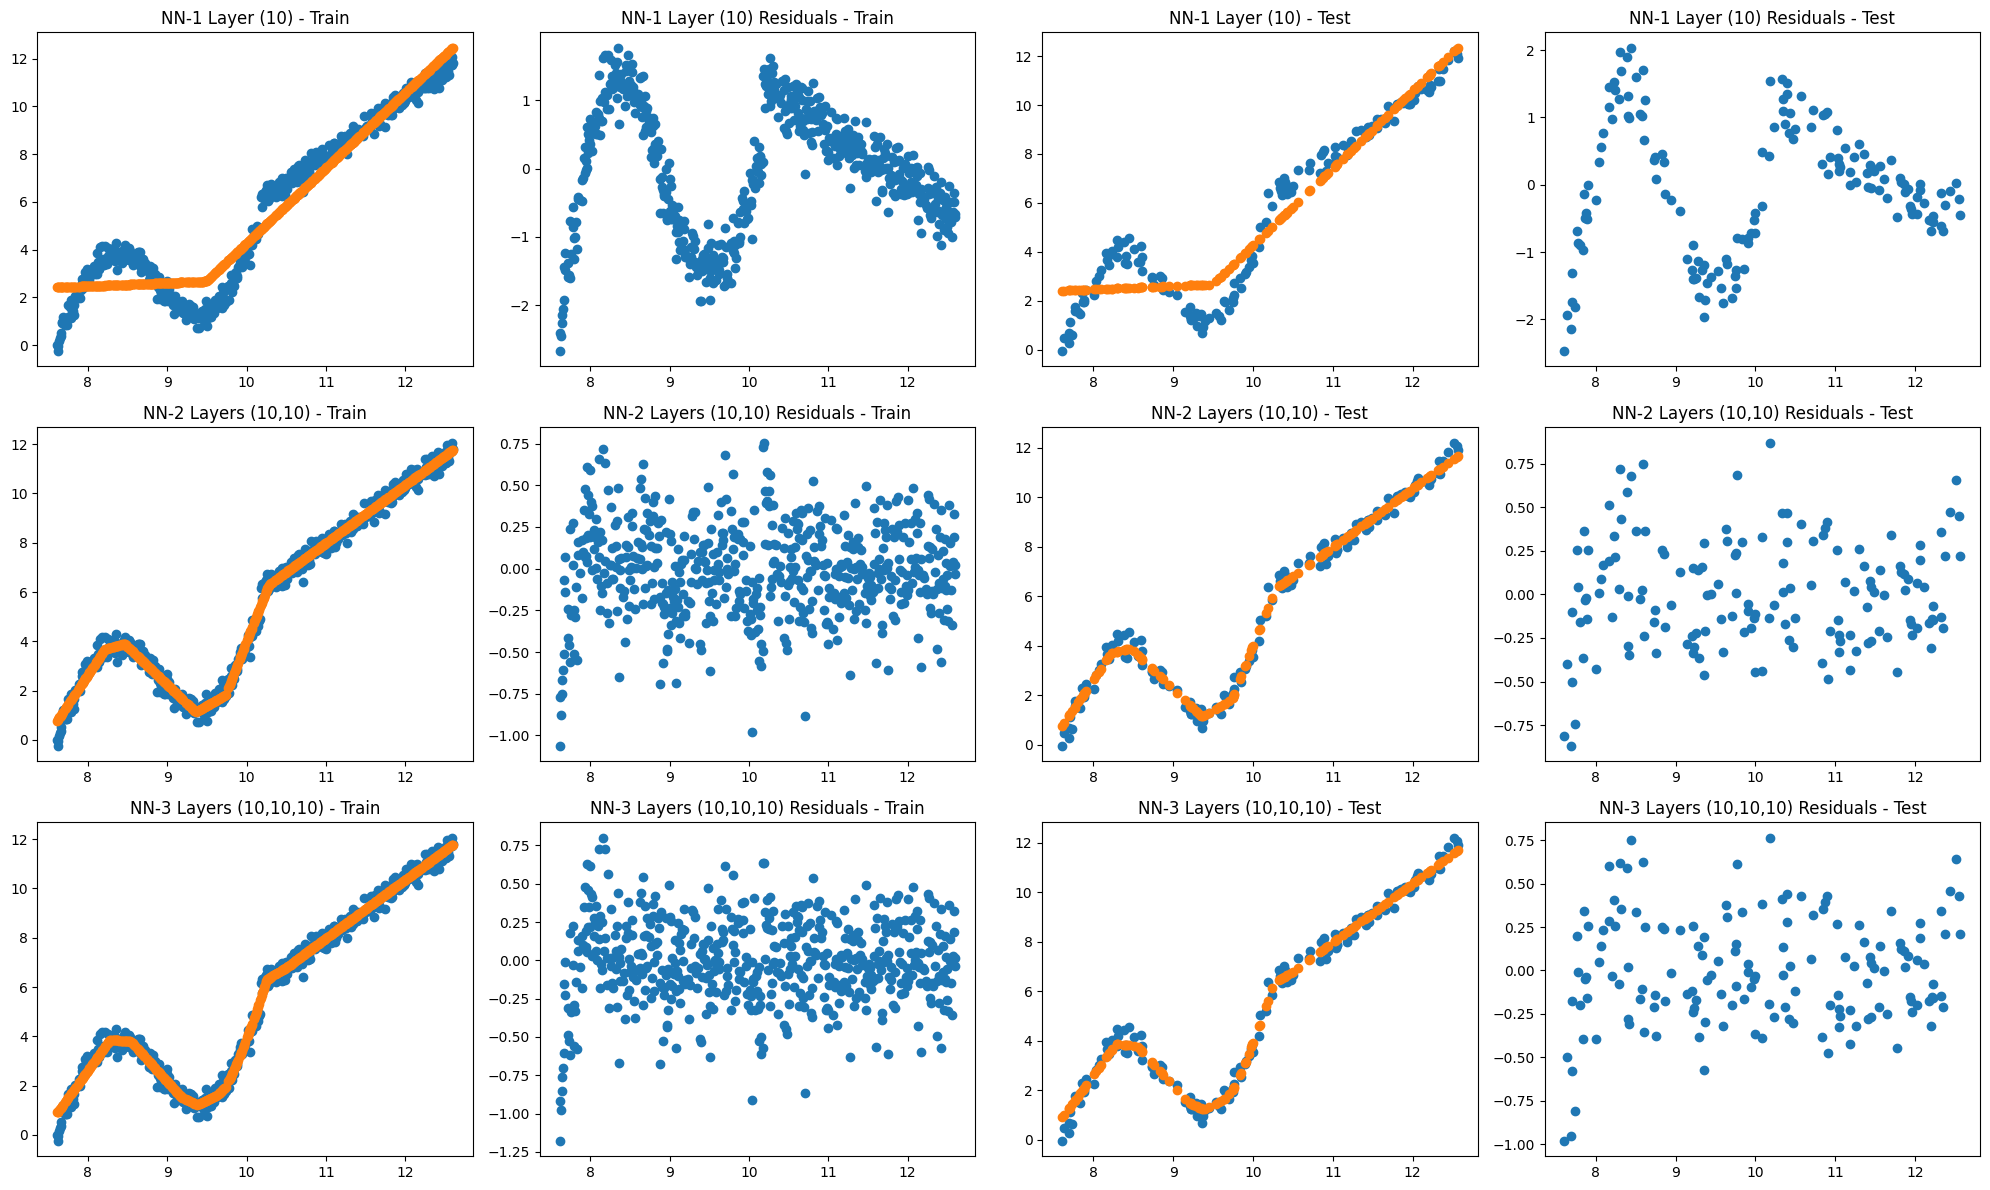

In [9]:
# Create a grid of subplots
fig, axs = plt.subplots(len(algorithms), 4, figsize=(20, 4 * len(algorithms)))
fig_row = -1

# Run the algorithms ... create metrics and plots
for algorithm_name, algorithm in algorithms.items():

    # Train model
    algorithm.fit(X_train_poly, y_train)

    # Train predictions
    y_train_pred = algorithm.predict(X_train_poly)

    # Test predictions
    y_test_pred = algorithm.predict(X_test_poly)

    # Train metrics
    r2_train = algorithm.score(X_train_poly, y_train)
    rmse_train = root_mean_squared_error(y_train, y_train_pred)

    # Test metrics
    r2_test = algorithm.score(X_test_poly, y_test)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)

    # Additional metrics using statsmodels for all algorithms
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred

    durbin_watson_stat_train = sm.stats.durbin_watson(residuals_train)
    jb_stat_train, jb_p_value_train, _, _ = sm.stats.jarque_bera(residuals_train)

    durbin_watson_stat_test = sm.stats.durbin_watson(residuals_test)
    jb_stat_test, jb_p_value_test, _, _ = sm.stats.jarque_bera(residuals_test)

    # Update metric tables
    metric_table_train.at[algorithm_name, 'R-squared'] = r2_train
    metric_table_train.at[algorithm_name, 'RMSE'] = rmse_train
    metric_table_train.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_train
    metric_table_train.at[algorithm_name, 'Jarque-Bera'] = jb_stat_train
    metric_table_train.at[algorithm_name, 'JB P-value'] = jb_p_value_train

    metric_table_test.at[algorithm_name, 'R-squared'] = r2_test
    metric_table_test.at[algorithm_name, 'RMSE'] = rmse_test
    metric_table_test.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_test
    metric_table_test.at[algorithm_name, 'Jarque-Bera'] = jb_stat_test
    metric_table_test.at[algorithm_name, 'JB P-value'] = jb_p_value_test

    # Create the plots
    fig_row = fig_row+1

    axs[fig_row, 0].scatter(X_train, y_train)
    axs[fig_row, 0].scatter(X_train, y_train_pred)
    axs[fig_row, 0].set_title(algorithm_name + " - Train")

    axs[fig_row, 1].scatter(X_train, residuals_train)
    axs[fig_row, 1].set_title(algorithm_name + " Residuals - Train")

    axs[fig_row, 2].scatter(X_test, y_test)
    axs[fig_row, 2].scatter(X_test, y_test_pred)
    axs[fig_row, 2].set_title(algorithm_name + " - Test")

    axs[fig_row, 3].scatter(X_test, residuals_test)
    axs[fig_row, 3].set_title(algorithm_name + " Residuals - Test")
############################

plt.tight_layout()
plt.show()

In [10]:
# Display the metrics' Tables
print("Metrics - Train Data:\n")
print(metric_table_train.to_string())
print("-------------------------------------------------")

print("Metrics - Test Data:\n")
print(metric_table_test.to_string())

Metrics - Train Data:

                        R-squared      RMSE  Durbin-Watson  Jarque-Bera    JB P-value
NN-1 Layer (10)          0.932303  0.898863       0.146157    17.217504  1.825015e-04
NN-2 Layers (10,10)      0.993462  0.279339       1.499435    12.673009  1.770480e-03
NN-3 Layers (10,10,10)   0.993509  0.278342       1.512692    34.844785  2.713633e-08
-------------------------------------------------
Metrics - Test Data:

                        R-squared      RMSE  Durbin-Watson  Jarque-Bera  JB P-value
NN-1 Layer (10)          0.921467  0.986697       0.177973     2.748799    0.252992
NN-2 Layers (10,10)      0.992171  0.311533       1.678978     0.634342    0.728206
NN-3 Layers (10,10,10)   0.992059  0.313753       1.698892     0.755333    0.685459
